In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

In [3]:
numThreads = [1, 2, 4, 8]
numLocks = [
      10,    100,   500,    1000,   2500,  5000, 10000,
      20000, 50000, 100000, 150000, 200000
]

insecure = pd.read_csv("insecure.csv")

In [11]:
# An experiment with the same parameters (number of locks, number of threads)
# is repeated multiple times. 
# This function computes the average runtime in nanoseconds over those repititions.
def averages_of_repeated_experiments(data):
  averages = []
  for n in numLocks:
    sum = 0
    count = 0
    for locks, duration in zip(data["locks"], data["nanoseconds"]):
      if locks == n:
        count += 1
        sum += duration
    averages.append((sum/count) / 10 ** 9); # average, from nanoseconds to seconds
  return averages


# Plots the runtime in nanoseconds it takes to acquire the given number of locks as a line graph.
def plot_runtime(data):
  averages = averages_of_repeated_experiments(data)

  fig = plt.figure(figsize=(15, 5))
  ax = fig.add_subplot(111)      
  ax.plot(numLocks, averages, "go-")
  plt.title("Time to acquire an increasing number of locks")
  plt.xlabel("Number of locks acquired")
  plt.ylabel("Runtime in seconds")
  plt.show()


# Plots the throughput of locks per second given the number of locks acquired as a line graph.
def plot_throughput(data):
  averages = averages_of_repeated_experiments(data)

  throughput = []
  for locks, duration in zip(numLocks, averages):
    throughput.append(locks / duration)

  fig = plt.figure(figsize=(15, 5))
  ax = fig.add_subplot(111)
  ax.plot(numLocks, throughput, "go-")
  plt.xlabel("Number of locks acquired")
  plt.ylabel("Throughput (Locks per nanosecond)")
  plt.title("Throughput relative to number of locks acquired")
plt.show()



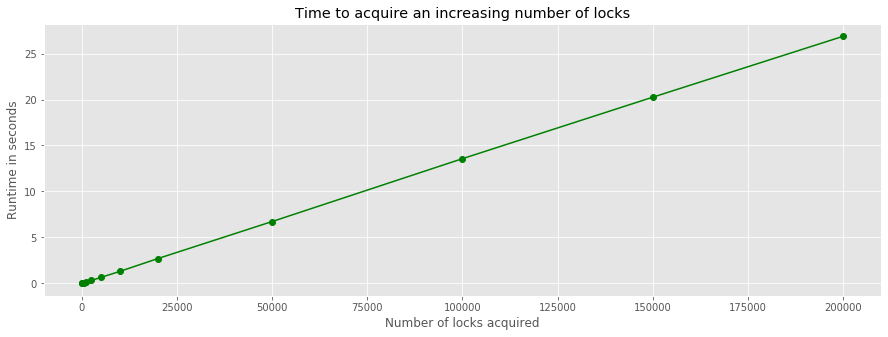

In [12]:
plot_runtime(insecure)

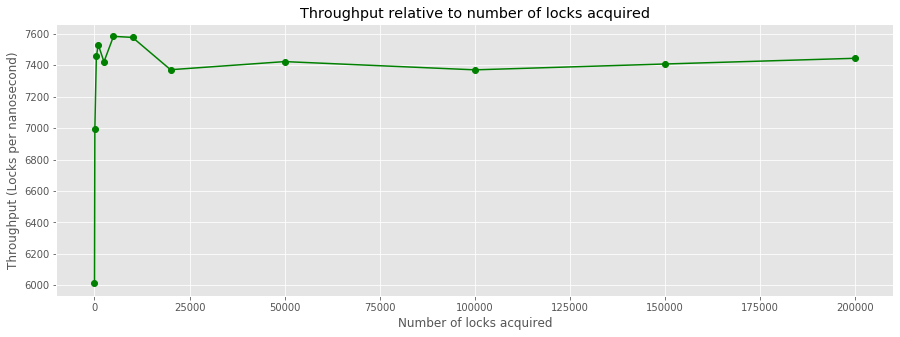

In [13]:
plot_throughput(insecure)